# How to run a CASCABEL pipeline from scratch to finish
### Maartje Brouwer
#### 15022021
##### This notebook is running Python 3.6.7

In [ ]:
# On ada, go to your projects directory
%cd /export/lv1/user/mbrouwer/Projects/

In [ ]:
# Start a new project directory
! initProject.sh <project_name>

In [ ]:
% cd project_name

In [ ]:
# A README file is automatically generated
# add as much information about the project as possible

%load README.md

# after editing put %%writefile command on top
## %%writefile README.md

In [ ]:
%cd project_name/Data/RawData
# copy softlinks to fastq files of the fwd and rev reads in the directory
! cp -s <filepath/to/fwdsequences.fastq fwdsequences.fastq
! cp -s <filepath/to/revsequences.fastq revsequences.fastq

%cd ../../ProjectInfo
# copy mappingfile to the directory
! cp -r <filepath/to/mappingfile.txt> .

In [ ]:
%cd /export/lv1/user/mbrouwer/Projects/project_name
# Setup CASCABEL
! cp -r /export/data01/pipelines/CASCABEL/ .
# cp -r copies an entire directory. the dot indicates copy in the current directory

## or clone it from GitHub
# git clone https://github/AlejandroAb/CASCABEL.git

In [ ]:
# Go to CASCABEL directory
%cd CASCABEL

In [ ]:
# Activate Cascabel dependencies
# at ada
! source ~/.bashrc.conda3
! source activate qiime1
! export PATH=$PATH:/opt/biolinux/anaconda3/bin
! module load R/4.0.3
! unset LD_PRELOAD

# at YMGA
# ! source  ~/.zshrc.conda344

##### Configuration files

there are different configuration files on the CASCABEL directory. These configuration files, are already preconfigured for some specific workflows

* config.asv.double_bc.yaml ASV workflow for paired end data
* config.asv.double_bc.unpaired.yaml ASV workflow for paired end data and “unpaired” reads.
* config.asv.single_bc.yaml ASV workflow for single end data
* config.otu.double_bc.yaml OTU workflow for paired end data
* config.otu.double_bc.unpaired.yaml OTU workflow for paired end data and “unpaired” reads.

First copy the config file and name it  
! cp config.asv.double_bc.yaml config.asv.double_bc.NIOZ102.yaml  
Then load the new file  
%load config.asv.double_bc.NIOZ102.yaml  
Then write %%writefile command (see above) on top, edit file and run  

[databases] (http://redmine.nioz.nl/projects/pipeline-for-amplicon-analysis/wiki/Run#9-Database)

In [ ]:
# %%writefile myconfig.yaml
# %load myconfig.yaml

In [ ]:
# Create a directed acyclic graph (DAG) of the entire pipeline
# Send it to a svg file called <clustering_method>.svg 
! snakemake --configfile configuration_file.methods.library_name.yaml --dag | dot -Tsvg > <clustering_method>.svg
# A DAG is a visual representation of the entire pipeline that will be run.

In [ ]:
# Make a dry-run to see the commands and the number of rules that are going to be executed.
! snakemake --configfile configuration_file.methods.library_name.yaml -np
# -np makes it a dry-run, so you can check all steps. If everything is fine, repeat without -np

In [ ]:
# Start a new screen and give it a logical name
screen -S <screen_name>

In [ ]:
# Run the pipeline
! snakemake --configfile configuration_file.methods.library_name.yaml

- You will get some QC prompts where you need to chose to stop or continue

- You will get a prompt at the length filtering step (rule: remove_short_long_reads)  
Print the sequence length histogram adjust the minimum and maximum values

In [ ]:
# Once the run is finished exit and terminate the screen
exit

### the output file structure 
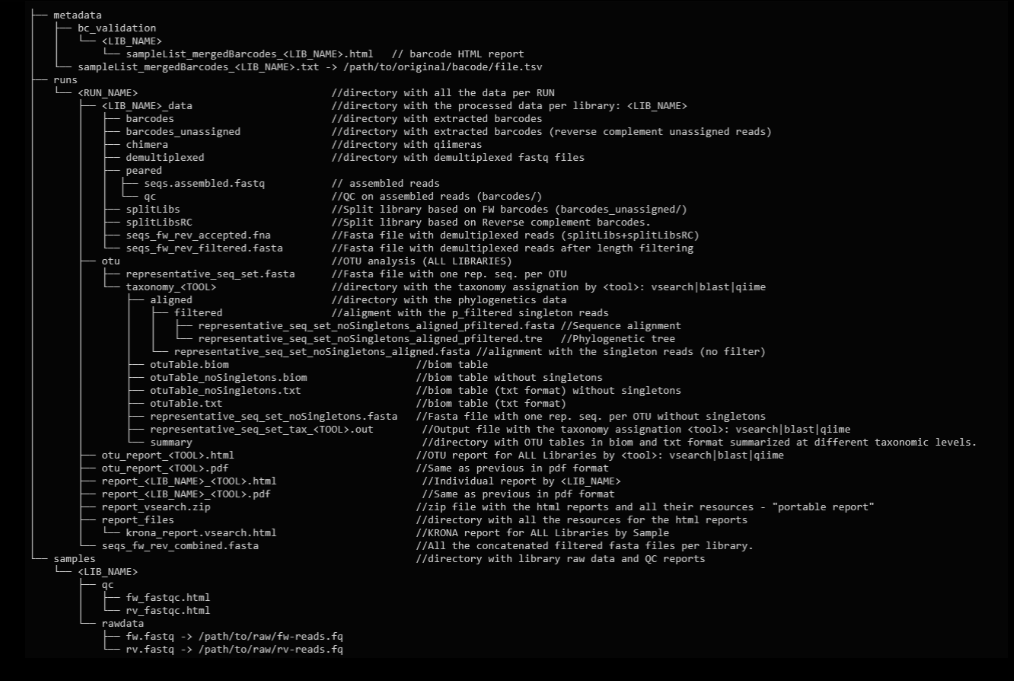